<a href="https://colab.research.google.com/github/HerzelS/machine_learning/blob/main/gamma_ray_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning

## What is Machine Learning?

Machine Learning (ML) is a branch of artificial intelligence (AI) that focuses on building systems that can **learn from data** and **make decisions or predictions** without being explicitly programmed.

Instead of writing specific instructions for every task, we provide data to an algorithm, and it **learns patterns** or relationships from that data. Once trained, the model can then apply what it has learned to new, unseen data.

There are different types of machine learning:

1.   Supervised Learning - uses labeled inputs (meaning the input has a corresponding output label) to train models and learn outputs.
2.   Unsupervised Learning - usues unlabeled data to learn about patterns in data.
3.   Reinforcement Learning - agent learning in interactive environment based on rewards and penalties.


## Supervised Learning

What we want to do is to try and predict for future whether the "class" is going to be "gamma" or "hedron". This is known as classification. All the other columns except for "class" are known as "features" and these will help us predict the "label" which is is in the column "class".

So we have 10 features which we can pass to the model and we can predict the label. This is "supervised machine learning".

### Features

* Qualitative -  categorical data (finite number of categories or groups e.g. gender, nationaltiy, location). This is norminal data and we handle it using what is known as "ONE-HOT ENCODING" i.e. "1" if it matches category.
* Quantitative - numerical valued data (could be discrete or continuos)

We feed our features into the model and then we get a prediction.

### Supervised Learnign Tasks

1. Classification - predict discrete classes. Here we have multi-class classification (Cat/Lizard/Dolphin, Plant Species, Car Model) and binary class classification (Positive/Negative, Cat/Dog, Spam/ Not Spam).
2. Regression - predict continus values e.g. gold price

### Understanding the Model itself

* Features make up the **Features Matix, x** while the Label/Targets column makes up the **Vector, y**.
* Each row of the feature matrix is fed into the model and compared to the actual true value in the vector y. We then go back and re-do the process again - this is known as traning.
* When working with our data we need to break up our data into three datasets: *Trainign Dataset*, *Validation Datset* and *Testing Dataset*.

Steps:
1. Feed Training Dataset into the model
2. Figure out what is the difference between the trainign value and the actual value - this is known as "**Loss**"
3. Make adjustments
4. Put validation set through the model - during or after training - to see the loss - loss is not fed back to the model. The lower the loss the better the model.
5. Test dataset is then used to check how generalizable the final chosen model is.
6. Get the final reported performance of the model.


## Metrics of Measuring Performance

### Loss

**Loss Functions**

Loss - difference between prediction and actual label.


a. **L1 Loss function**

Takes the abolute value of real and subracts predicted.

<div align="center">

(loss = sum( | y<sub>real</sub> - y<sub>predicted</sub> | ))

</div>

b. **L2 Loss**

Quadratic function - If its close the penalty is very minimal and if its off by a lot then the penalty is much much higher.

<div align="center">
los = sum(( y <sub>real</sub> - y <sub>predicted</sub> )<sup>2</sup>)
</div>


c. **Binary Cross-Entropy Loss**
<div align="center">
loss = -1/N*sum(y<sub>real</sub>*log(y<sub>predicted</sub>)+(1-y<sub>real</sub>)*log((1-y<sub>predicted</sub>)))
</div>

NB: Loss decreases as performance gets better.

### Accuracy

* Accuracy is:

$$
\text{Accuracy} = \left( \frac{\text{Correct Predictions}}{\text{Total Frame}} \right) \times 100
$$

#### Classification Models

This looks at four classification models:


1.   KNN
2.   Naive Bayes
3.   Regression Model
4.   SVM


### K Nearest Neighbours (kNN)

#### **What is K-Nearest Neighbors (KNN)?**

K-Nearest Neighbors (KNN) is a simple, intuitive machine learning algorithm used for both **classification** and **regression**. It works by predicting the output based on the **K nearest data points** to the input point.

#### **How does KNN work?**

1. **Choose the number of neighbors (K)**:
   - We begin by choosing the number **K**. This represents the number of neighbors we will look at when making a prediction. A typical value for **K** is 3, 5, or 7.

2. **Measure the distance**:
   - The next step is to measure the **distance** between the data points. **Euclidean distance** is commonly used, but other distance metrics are also possible.

3. **Find the nearest neighbors**:
   - After calculating the distance, we identify the **K nearest neighbors** to the data point.

4. **Make the prediction**:
   - **For classification**: The point is assigned the most common class among its **K nearest neighbors**.
   - **For regression**: The prediction is made by averaging the values of the K nearest neighbors.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

Dataset:

In [ ]:
# Create a list of columns to add them as column names, since the dataset does not have column names
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# Check the class
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
# Lets convert "class" to numeric
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
# Now let us recheck "class"
df["class"].unique()

array([1, 0])

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

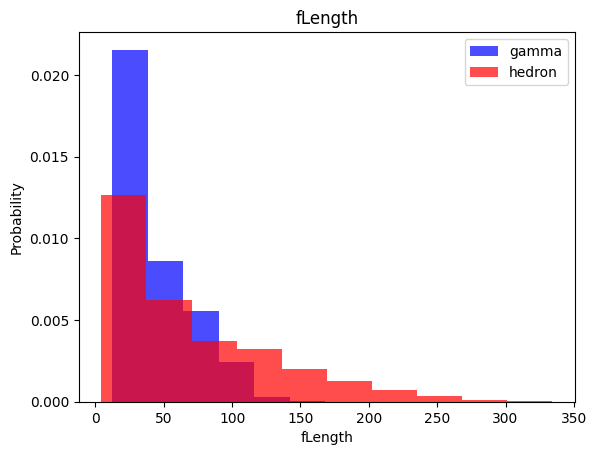

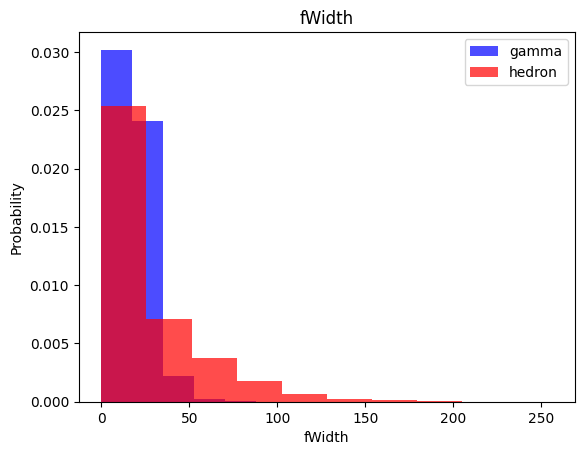

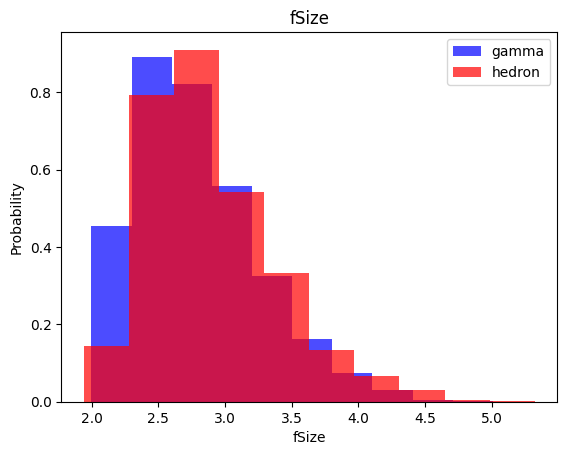

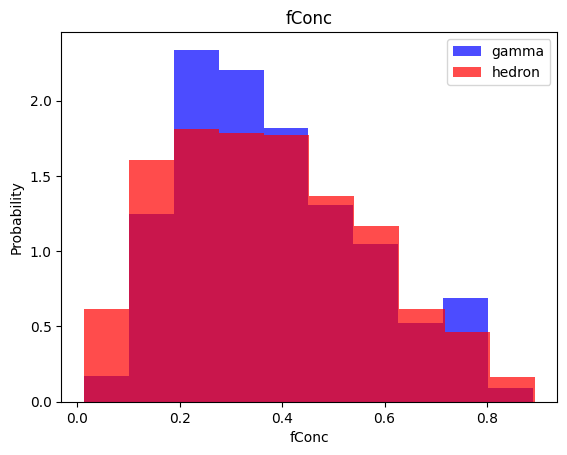

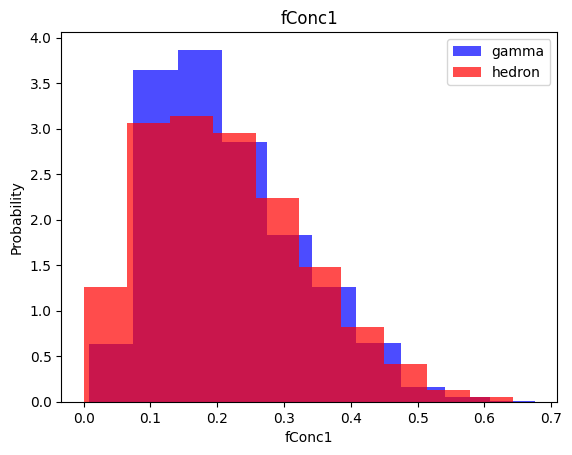

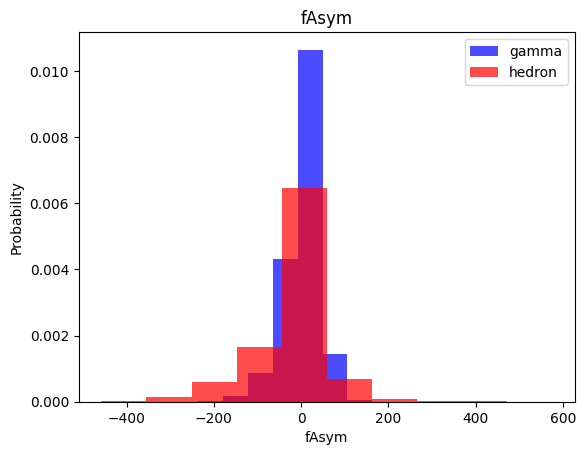

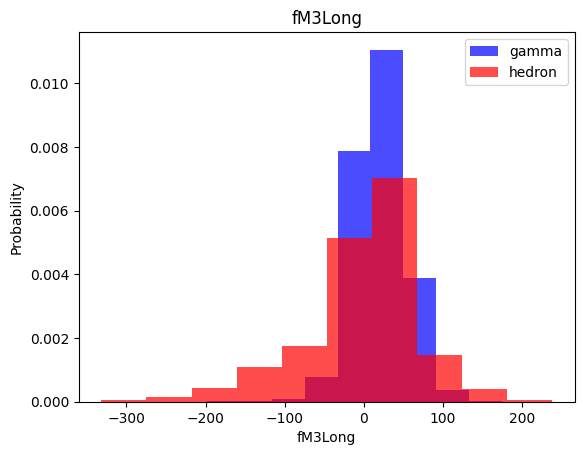

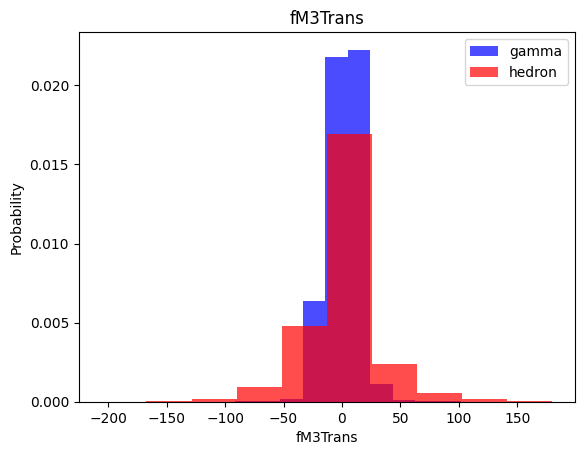

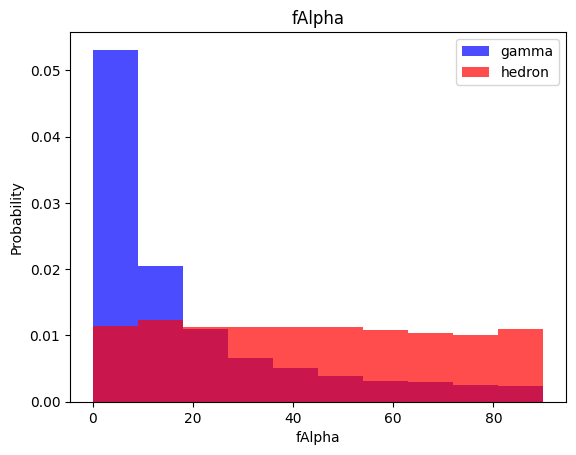

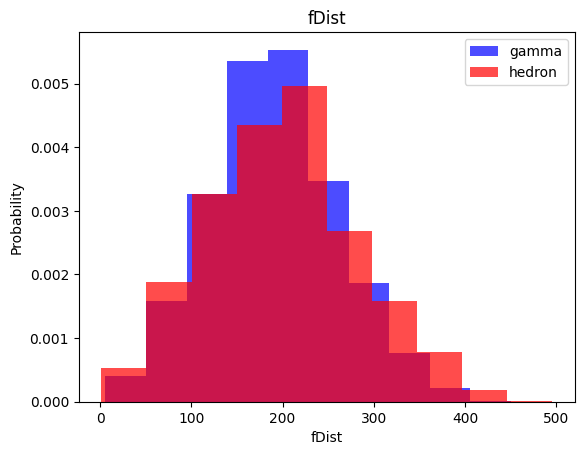

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="red", label="hedron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    x, y = RandomOverSampler().fit_resample(x, y)

  # Create the whole data as a horizontal numpy array
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
print(len(train[train["class"] == 1])) # Gamma
print(len(train[train["class"] == 0])) # Hadron

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

We want to oversampele our data so that these match.

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1313
           1       0.86      0.85      0.86      2491

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804





* Accuracy is 80%
* Prescision for hadron is 76% and gamma is 82%

Precision:

<div align="center">
$$
\text{Prescision} = \frac{\text{True positives}}{\text{True Positives} +
\text{False Positives}}
$$
</div>


Recall


<div align="center">

$$
\text{Recall} = \frac{\text{True Postives}}{\text{False Negatives} +
\text{True Positives}}
$$

</div>


## Naive Bayes Model

#### What is Naive Bayes?
Naive Bayes is a **probabilistic** machine learning algorithm based on **Bayes' Theorem**, and it is particularly well-suited for **classification problems**. It assumes that the features used for classification are **independent**, hence the term "naive."

Despite this assumption often being unrealistic in real-world data (as features are usually correlated), Naive Bayes performs surprisingly well in many cases.

#### How does Naive Bayes work?
Naive Bayes classifies data by calculating the **posterior probability** of each class and selecting the class with the highest probability.

The formula used is based on **Bayes' Theorem**:

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

Where:
- \( P(C \mid X) \) is the **posterior probability** of class \( C \) given the features \( X \).
- \( P(X \mid C) \) is the **likelihood** of observing the features \( X \) given class \( C \).
- \( P(C) \) is the **prior probability** of class \( C \).
- \( P(X) \) is the **evidence** or probability of the features \( X \).

The "naive" part comes from the assumption that the features \( X = (x_1, x_2, \ldots, x_n) \) are **independent**, so we can calculate the likelihood as:

$$
P(X \mid C) = P(x_1 \mid C) \cdot P(x_2 \mid C) \cdot \ldots \cdot P(x_n \mid C)
$$

This simplifies the model and makes it computationally feasible.

#### Steps for Naive Bayes:
1. Calculate the **prior probability** for each class \( P(C) \).
2. Calculate the **likelihood** of each feature given the class \( P(x_i \mid C) \).
3. Apply **Bayes' Theorem** to compute the **posterior probability** for each class.
4. Select the class with the highest **posterior probability**.



**Bayes Rule**


<div align="center">

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

</div>


Example

<div align="center">

<div align="center">
Covid Test Result
</div>

|            | Status | Positive | Negative |Total  |
|------------|--------|----------|----------|-------|
|            | Y      | 531      | 6        | 537   |
|  Has Covid?| N      | 20       | 9443     | 9463  |
|            | Total  | 551      | 9449     | 10000 |


</div>



Categories:


1.   People who have Covid and test positive
2.   People who have COVID but test negative
3.   People who do not have COVID and test negative
4.   People who do not have COVID but test positive


Question: What is the probabilioty of having COVID given a positive test?


<div align="center">

$$
\text{P(COVID | + test)} = \frac{\text{531}}{\text{551}}
= 96.4%
$$

</div>


**Bayes' Rule**

- This rule asks, what is the probability of some event A happening, given that B happened.

<div align="center">

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

</div>

In the equaiton:

* B is the condition

Now the question is that what if we don't have data on the condition. We can work using the formula.

Application

Lets say we have some disease and we know that:

* P(false positive) = 0.05
* P(false negative) = 0.01
* P(disease) = 0.1
* P(disease | (+)test) = ?


</div>

|            |Positive  | Negative |Total |
|------------|----------|----------|------|
|  Disease   | 0.99     | 0.01     | 1    |
|  No disease| 0.05     | 0.95     | 1    |

</div>



$$
P({disease} \mid +) = \frac{P(+ \mid \text{disease}) \cdot P({disease})}{P(+)} = \frac{0.99 \cdot 0.1}{P(+)} = \frac{0.99 \cdot 0.1}{P(+ \mid disease) \cdot P(disease) + P(+ \mid no-disease) \cdot P(no-disease)} = \frac{0.99 \cdot 0.1}{099 \cdot 0.1 + 0.05 \cdot 0.9} = 0.6875 \space or \space 68.75 \space percent
$$

We can expand this equation and this is what is called **Naive Bayes**

Terminology:

* Posterior = P(C<sub>k</sub> | x) - what is the probability of some class CK (categories or classes) e.g. C<sub>1</sub> might be Cats, C<sub>2</sub> might be Dogs and C<sub>3</sub> might be Parrots....C<sub>k</sub>
* x is the feature vector - so the expression *P(C<sub>k</sub> | x)* means, what is the probability that it is actually from this class given all this evidence that we see in all the x's.
* likelihood = P(x | C<sub>k</sub>) - what is the likelihood of actually seeing x given all these different features from that category.
* prior = P(C<sub>k</sub>) - in the entire population of things, what is the probability in general? e.g. In my entire dataset, what is the probability that this image is a cat?
* evidence = P(x) - probability of x


Rule for Naive Bayes:

$$
P(C_k \mid x_1, x_2, x_3, \ldots, x_n) \propto P(C_k) \cdot \pi^n_{i = 1} P(x_i \mid C_k)
$$


What is this **P(C<sub>k</sub> | x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, ..., x<sub>n</sub>)** side of the equation asking? It is asking what is the probability that we are in some class K, given all the x inputs from x<sub>1</sub> to x<sub>n</sub>. For example if we are predicting whether we play soccer today give whether its raining, day of the  week, wind speed, time of the day.

Derivation

$$
P(C_k \mid x_1, x_2, x_3, \ldots, x_n) = \frac{P(x_1, x_2, x_3, \ldots, x_n \mid C_k) ⋅ P(C_k)}{P(x_1, x_2, x_3, \ldots, x_n)}
$$

NB: You will notice that the denominator has no impact on the class so C<sub>k</sub> is going to be constant for all our different classes. So we can say:


$$
{P{C_k \mid x_1, x_2, x_3, \ldots, x_n}} = {P(x_1, x_2, x_3, \ldots, x_n \mid C_k) ⋅ P(C_k)}
$$


Naive Bayes assumes that our "x"s are independent. So we can just expand as:

$$
{P(x_1, x_2, x_3, \ldots, x_n \mid C_k)} = {P{(x_1 \mid C_k) ⋅ P(x_1 \mid C_k)... ⋅ P(x_n \mid C_k)}}
$$


We can also expand P(C<sub>k</sub> | x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, ..., x<sub>n</sub>) as:

$$
P(C_k) \prod_{i=1}^n P(x_i \mid C_k)
$$

Summing up: This is saying the probabiulut that we are in some category given that we have all these different features is proportional to the probability of that class in general times the probability of those features given that we are in this one class that we are testing. E.g. Probability that we will play soccer today given that its raining, not windy and it Wednesday is propotional to "what is the probability that we play soccer anyways" times the probablity that "its rainy given that we play soccer" times the propability that "its windy given that we are playing soccer" i.e. how many times are we playing soccer when its not windy and what is the probability that its Wednesday and we are playing soccer.

How do we then use this to make a classification:

The predicted value is denoted by \\( \hat{y} \\), which is an estimate of the true value \\( y \\).


$$
\hat{y} = argmax_{k \sum(1,..k)}P(C_k) \prod_{i=1}^n P(x_i \mid C_k)
$$

This approach is known as Maximum A Posteriori.

# Now back to the code

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

Make the prediction

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.50      1345
           1       0.73      0.88      0.80      2459

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804



### Logistic Regression

How can we model probability?

$$
p = mx + b
$$

However, the problem is that x can be from infnity to infinity while one of the rules for probability is that it has to stay between zero and 1.

So instead of setting the probability, we can set the odds equal to this and it becomes a ratio:

$$
\frac{p}{1 - p} = mx + b
$$

This ratio is allowed to take on infinity values. However, still *mx + b* can still be negative. We fix that by takign the log of the odds:

$$
ln(\frac{p}{1 - p}) = mx + b
$$

How then do we solve for p - probablity.

First thing is you can remove the log by taking the e:
$$
_{e}ln(\frac{p}{1 - p}) = _{e}mx + b
$$

thus:

$$
\frac{P}{1-P} = _{e}mx + b
$$

so:

$$
P = (1-P)_{e}mx + b = {e}^{mx + b} - pe^{mx + b}
$$

thus:


$$
P(1 + e^{mx + b}) = e^{mx + b}
$$

and:

$$
p = \frac{e^{mx + b}}{1 + e^1}
$$

To get a numerator of 1 on top:

$$
p = \frac{e^{mx + b}}{1 + e^1} ⋅ \frac{e^{(-mx + b)}}{e^{(-mx + b)}}
$$

Probability then becomes:

$$
p = \frac{1}{1 + e^{(-mx + b)}}
$$

This isa special function called the sigmoid function which looks like:

$$
S(y) = \frac{1}{1 + e^{(-y)}}
$$

The sigmoid function gives us the curved s that we find in logistic regression.

Accuracy of Naive Bayes: 96.67%


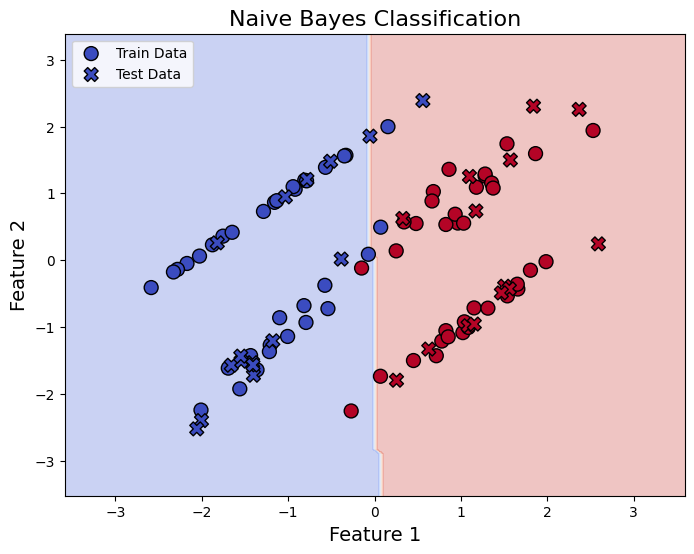

In [ ]:
# Naive Bayes Explanation and Code

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for classification
from sklearn.datasets import make_classification

# Naive Bayes: An Intuitive Introduction
"""
What is Naive Bayes?
Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem, and it is particularly well-suited for classification problems. It assumes that the features used for classification are independent, hence the term "naive."
Despite this assumption often being unrealistic in real-world data (as features are usually correlated), Naive Bayes performs surprisingly well in many cases.

How does Naive Bayes work?
Naive Bayes classifies data by calculating the posterior probability of each class and selecting the class with the highest probability.
The formula used is based on Bayes' Theorem:

    P(C | X) = (P(X | C) * P(C)) / P(X)

Where:
- P(C | X) is the posterior probability of class C given the features X.
- P(X | C) is the likelihood of observing the features X given class C.
- P(C) is the prior probability of class C.
- P(X) is the evidence or probability of the features X.

The "naive" part comes from the assumption that the features X = (x1, x2, ..., xn) are independent, so we can calculate the likelihood as:

    P(X | C) = P(x1 | C) * P(x2 | C) * ... * P(xn | C)

This simplifies the model and makes it computationally feasible.
"""

# Create a simple 2D dataset for classification
#X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_classes=2, random_state=42)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes classifier (Gaussian Naive Bayes)
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes: {accuracy * 100:.2f}%")

# Visualize the dataset and the decision boundary of Naive Bayes
plt.figure(figsize=(8, 6))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, edgecolors='k', cmap=plt.cm.coolwarm, label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolors='k', marker='X', cmap=plt.cm.coolwarm, label="Test Data")

plt.title("Naive Bayes Classification", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left")
plt.show()


Explanation:
Naive Bayes: I’ve included a brief explanation of Naive Bayes theory at the start of the notebook. You can easily see how the classifier works based on Bayes' Theorem.

Code Implementation:

We generate a synthetic 2D dataset using make_classification and split it into a training and testing set.

We use the Gaussian Naive Bayes classifier from sklearn (GaussianNB) for continuous data.

After training the classifier on the training set (X_train, y_train), predictions are made on the test set (X_test), and accuracy is computed.

Visualization:

The code generates a plot showing the decision boundary learned by the Naive Bayes model, which classifies points into two classes.

The train data is shown with large circles, and the test data is shown with smaller X-marked points.

### 🚀 Logistic Regression – An Intuitive Introduction

#### How can we model probability?

Let’s start with a simple linear equation:

$$
p = mx + b
$$

But there’s a problem:  
The left side, \( p \), represents a probability — and **probabilities must be between 0 and 1**.  
However, the right side, \( mx + b \), can take on **any value** from \( -\infty \) to \( +\infty \).  
This violates the basic rule of probabilities.

---

#### So what do we do?  
Instead of modeling the probability directly, we model the **odds** of the event happening:

$$
\text{Odds} = \frac{p}{1 - p}
$$

This ratio tells us how likely an event is to happen compared to it **not** happening.  
The odds can range from 0 to \( +\infty \), which is better — but we can do even better.

---

#### Let’s take it further: the log-odds (logit)

We now apply the natural logarithm (ln) to the odds:

$$
\ln \left( \frac{p}{1 - p} \right) = mx + b
$$

This transforms the output to range from \( -\infty \) to \( +\infty \), which fits perfectly with a linear equation.  
This transformation is called the **logit** function — and this is what logistic regression models.

---

#### Solving for the probability \( p \)

Now, let’s isolate \( p \). Starting from:

$$
\ln \left( \frac{p}{1 - p} \right) = mx + b
$$

We exponentiate both sides to cancel the log:

$$
\frac{p}{1 - p} = e^{mx + b}
$$

Now solve for \( p \):

$$
p = \frac{e^{mx + b}}{1 + e^{mx + b}}
$$

---

#### Simplifying to the sigmoid function

The final form is:

$$
p = \frac{1}{1 + e^{-(mx + b)}}
$$

This function is called the **sigmoid** (or logistic) function. It maps any real value (from \( -\infty \) to \( +\infty \)) smoothly into the interval \( (0, 1) \).  
That’s perfect for modeling probabilities.

---

#### Sigmoid function notation

Sometimes we write the sigmoid more generally as:

$$
S(y) = \frac{1}{1 + e^{-y}}
$$

Where \( y = mx + b \). This gives us the classic **S-shaped curve** of logistic regression.

---

#### 📌 Real-Life Examples of Logistic Regression

1. **Email Spam Classification**  
   - Input: Frequency of spammy words, sender reputation  
   - Output: Probability that an email is spam (1 = spam, 0 = not spam)

2. **Loan Default Prediction**  
   - Input: Credit score, income, loan amount  
   - Output: Probability a person will default on their loan

3. **Medical Diagnosis**  
   - Input: Age, blood pressure, test results  
   - Output: Probability a patient has a disease (e.g., heart disease)

4. **Customer Churn**  
   - Input: Usage patterns, support tickets, subscription duration  
   - Output: Probability a customer will cancel the service

5. **Online Advertising**  
   - Input: User demographics, ad features, time of day  
   - Output: Probability that a user will click an ad

---

Logistic regression helps us answer **yes-or-no questions** based on input data — making it one of the most widely used classification tools in data science.

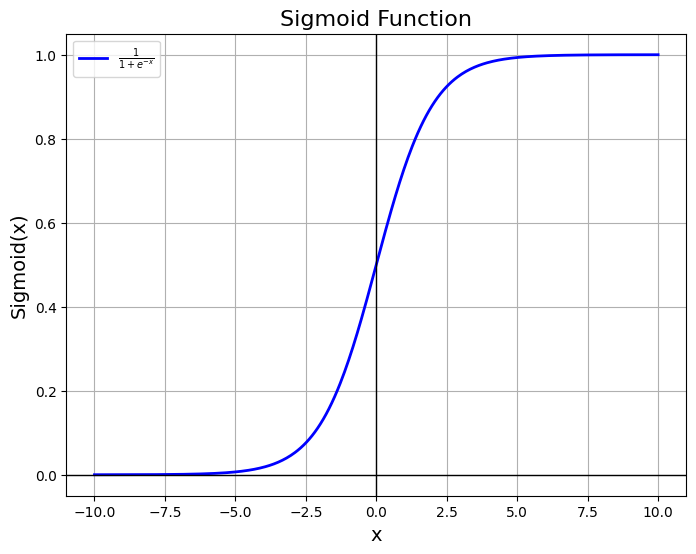

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x (input)
x = np.linspace(-10, 10, 400)

# Apply the sigmoid function
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\frac{1}{1 + e^{-x}}$', color='b', lw=2)

# Add labels and title
plt.title("Sigmoid Function", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Sigmoid(x)", fontsize=14)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1313
           1       0.85      0.81      0.83      2491

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



### 🚀 Support Vector Machines (SVM) – An Intuitive Introduction

#### **What is a Support Vector Machine (SVM)?**

A **Support Vector Machine (SVM)** is a powerful algorithm used for both classification and regression tasks, but it is most commonly used for **classification** problems.

The goal of an SVM is to find the **best boundary (or hyperplane)** that separates data into different classes. This boundary is called the **decision boundary**. In simple terms, an SVM tries to create a line (in 2D) or a hyperplane (in higher dimensions) that best divides the data into two groups.

#### **How does SVM work?**

Let’s break it down:

1. **Linearly Separable Data:**
   If the data is linearly separable (i.e., it can be separated with a straight line or hyperplane), the SVM finds the optimal line that divides the two classes.
   
   The "optimal" line is the one that maximizes the **margin** between the two classes, meaning the line is placed in such a way that the distance between the closest data points (called **support vectors**) of each class is as large as possible.

2. **Margin and Support Vectors:**
   The points that are closest to the decision boundary are called **support vectors**. These points are critical because they are used to determine the position of the decision boundary. The larger the margin between the support vectors of the two classes, the better the model.

3. **Non-Linearly Separable Data:**
   When the data is not linearly separable (i.e., cannot be divided with a straight line), the SVM uses a **kernel trick** to transform the data into a higher-dimensional space where a hyperplane can be used to separate the data. This allows SVM to work in more complex scenarios.

#### **Real-Life Examples of SVM:**

- **Image Classification**: SVM can be used to classify images, like identifying cats and dogs in photos.
- **Medical Diagnosis**: SVM is useful for classifying patients as healthy or diseased based on medical test results.
- **Spam Detection**: SVM can be used to classify emails as spam or not spam based on their content.
- **Face Recognition**: SVM helps to distinguish different people in facial recognition systems.

---

### **Visualizing a Simple SVM in 2D**

We will now visualize how SVM works for a simple 2D dataset. We'll create two classes and show the **decision boundary**, the **support vectors**, and the **margin**.

---

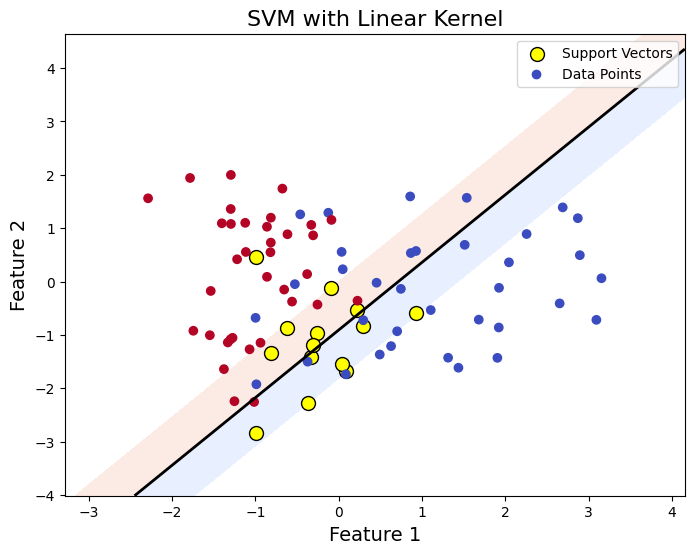

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Create a simple 2D dataset (corrected)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Split into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_1, y_train_1)

# Get the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the decision boundary and margin
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.coolwarm, alpha=0.2)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], facecolors='yellow', edgecolors='black', s=100, label="Support Vectors")
plt.scatter(X_train_1[:, 0], X_train[:, 1], c=y_train_1, cmap=plt.cm.coolwarm, marker='o', label="Data Points")
plt.title("SVM with Linear Kernel", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1313
           1       0.90      0.89      0.89      2491

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history


In [ ]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

Training model with 16 nodes, dropout 0, lr 0.01, batch size 32


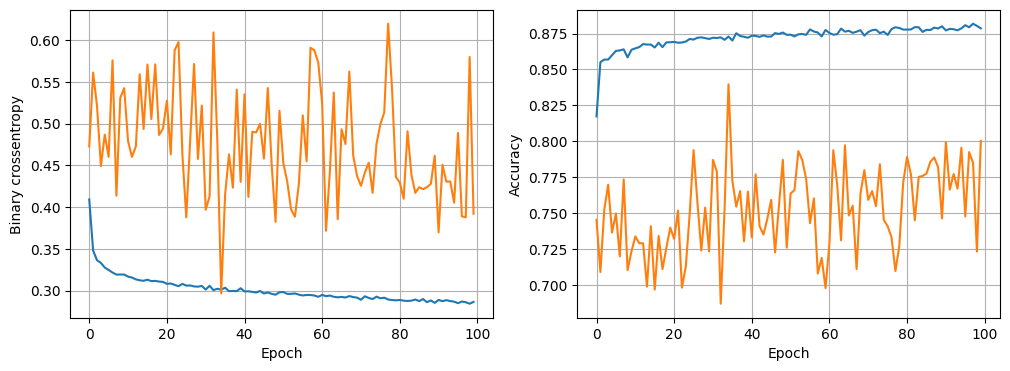

Training model with 16 nodes, dropout 0, lr 0.01, batch size 64


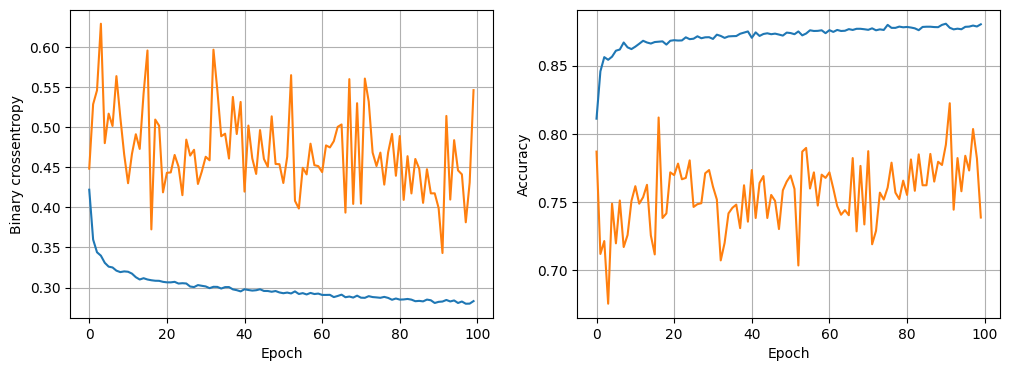

Training model with 16 nodes, dropout 0, lr 0.01, batch size 128


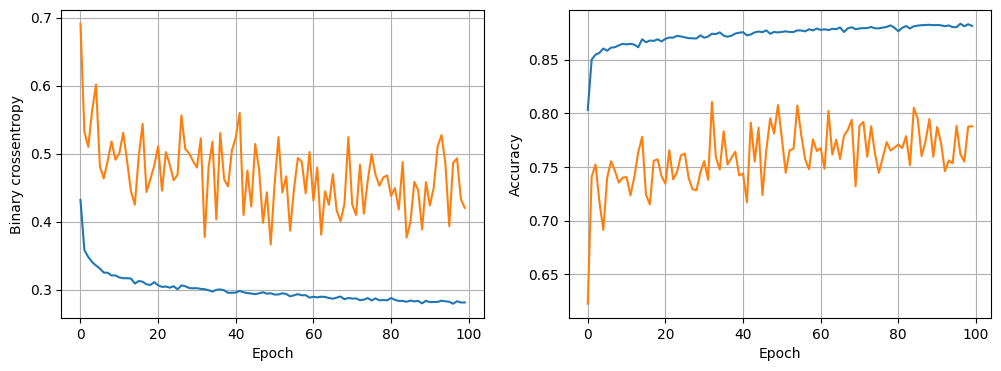

Training model with 16 nodes, dropout 0, lr 0.005, batch size 32


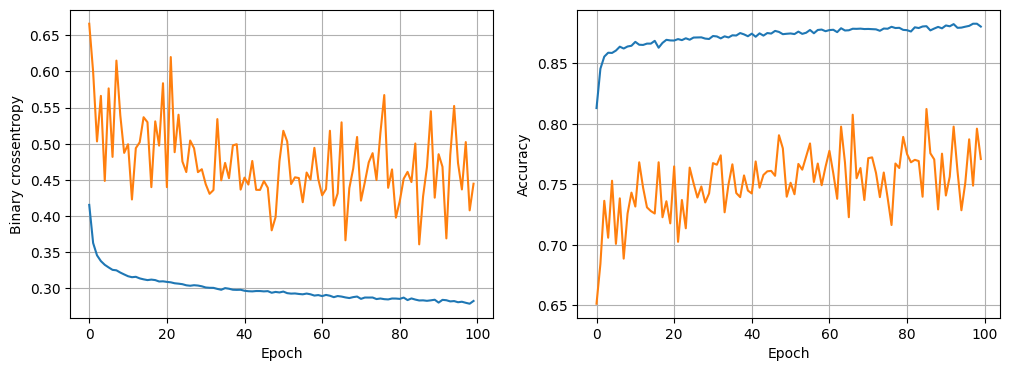

Training model with 16 nodes, dropout 0, lr 0.005, batch size 64


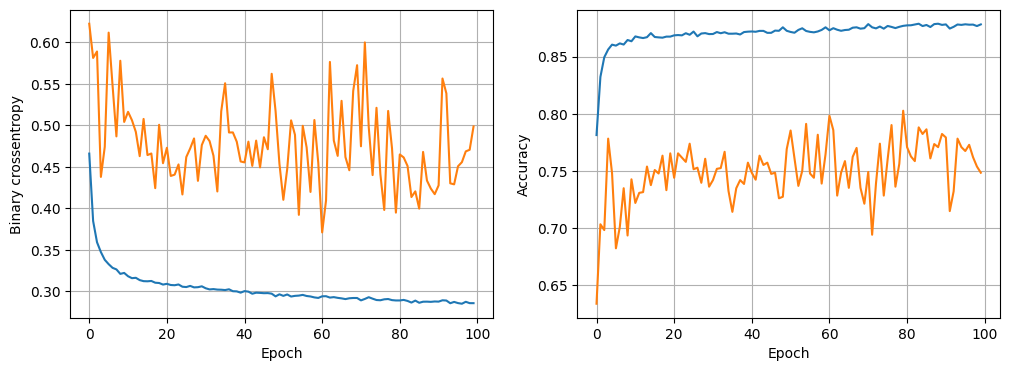

Training model with 16 nodes, dropout 0, lr 0.005, batch size 128


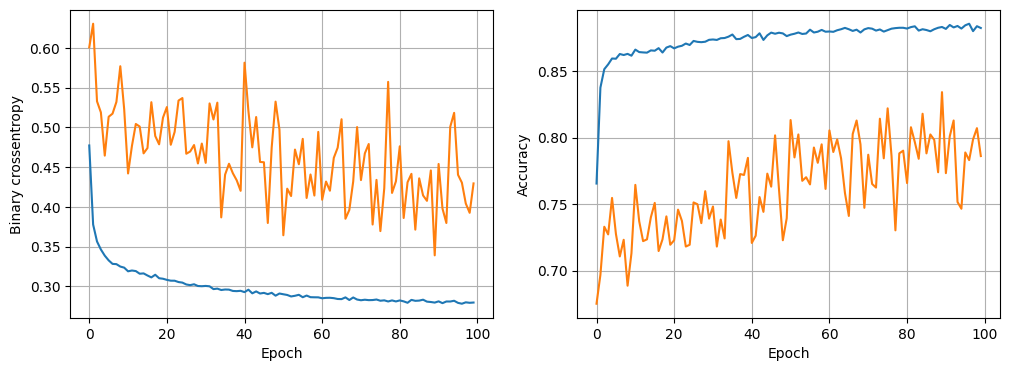

Training model with 16 nodes, dropout 0, lr 0.001, batch size 32


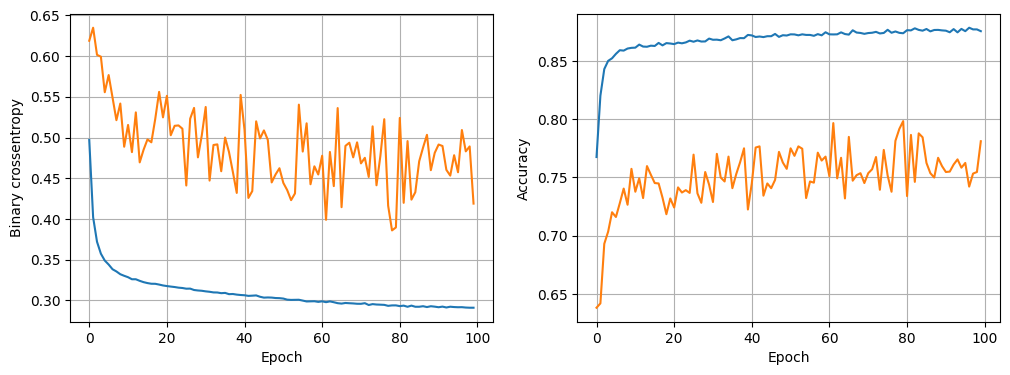

Training model with 16 nodes, dropout 0, lr 0.001, batch size 64


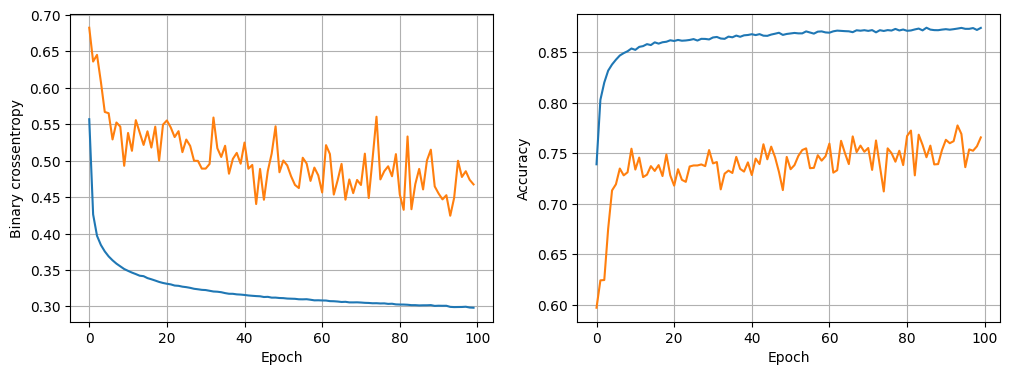

Training model with 16 nodes, dropout 0, lr 0.001, batch size 128


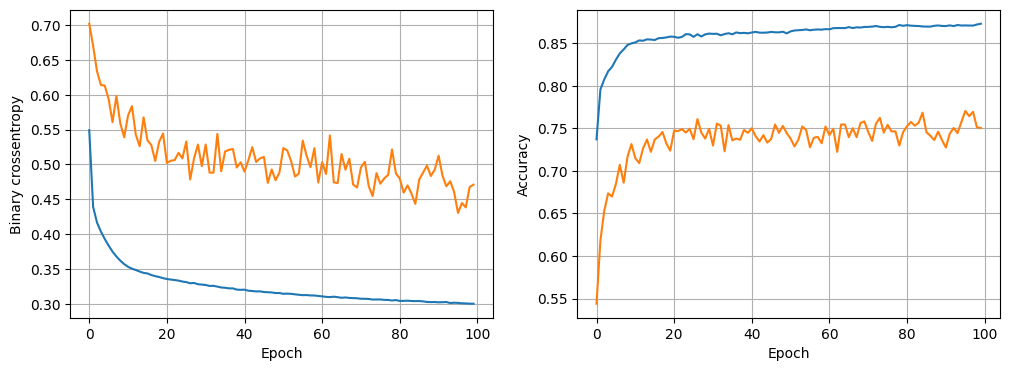

Training model with 16 nodes, dropout 0.2, lr 0.01, batch size 32


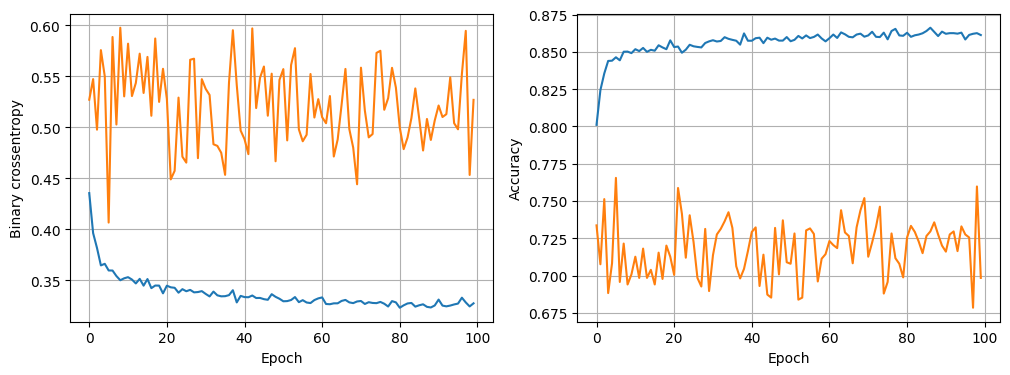

Training model with 16 nodes, dropout 0.2, lr 0.01, batch size 64


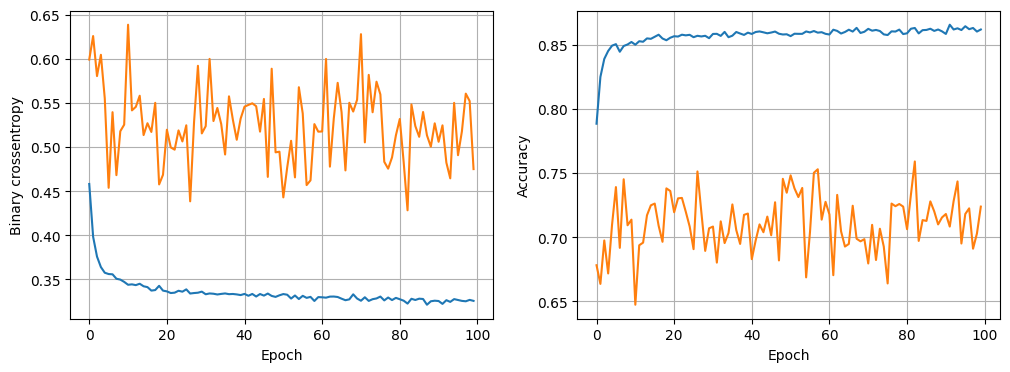

Training model with 16 nodes, dropout 0.2, lr 0.01, batch size 128


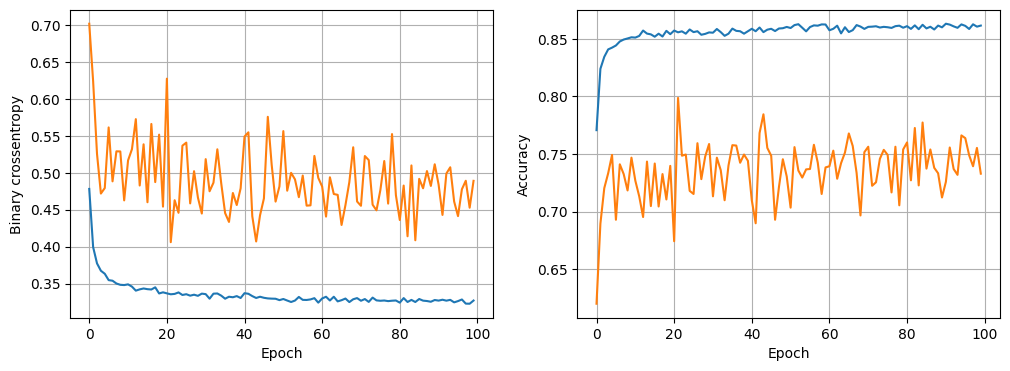

Training model with 16 nodes, dropout 0.2, lr 0.005, batch size 32


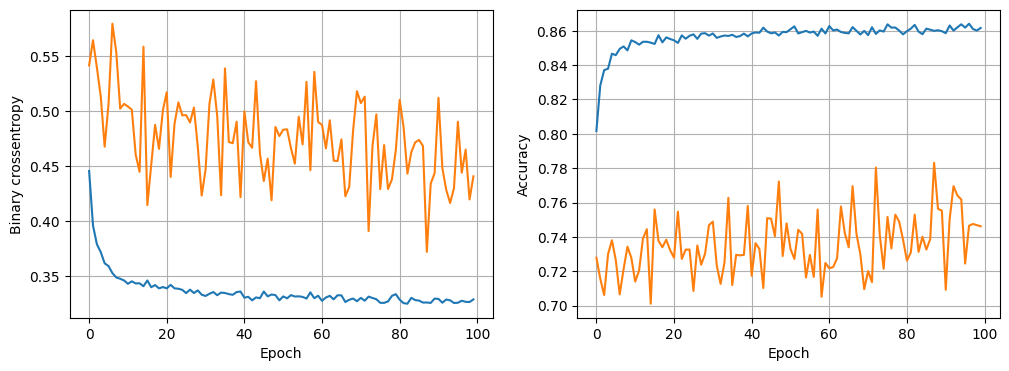

Training model with 16 nodes, dropout 0.2, lr 0.005, batch size 64


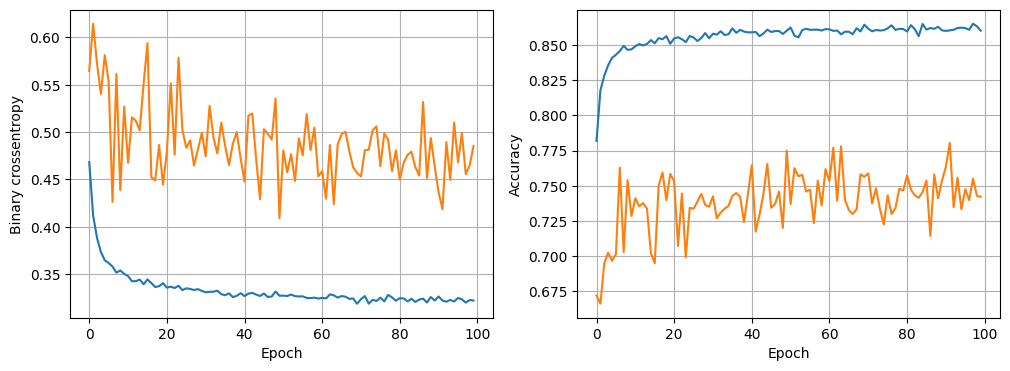

Training model with 16 nodes, dropout 0.2, lr 0.005, batch size 128


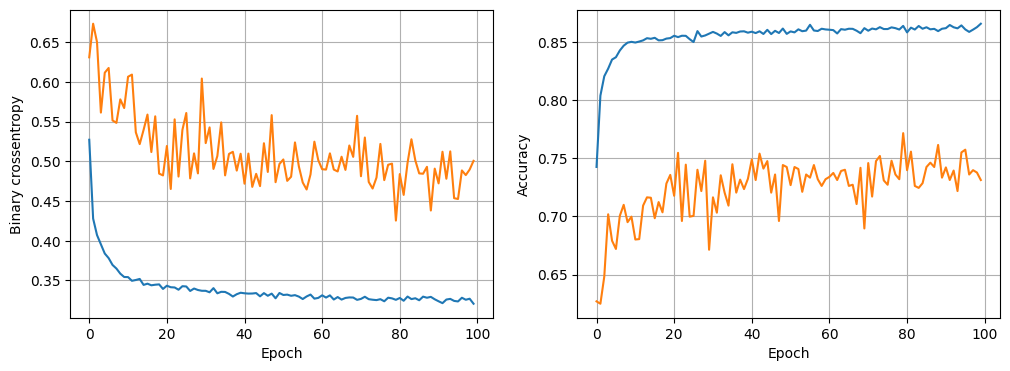

Training model with 16 nodes, dropout 0.2, lr 0.001, batch size 32


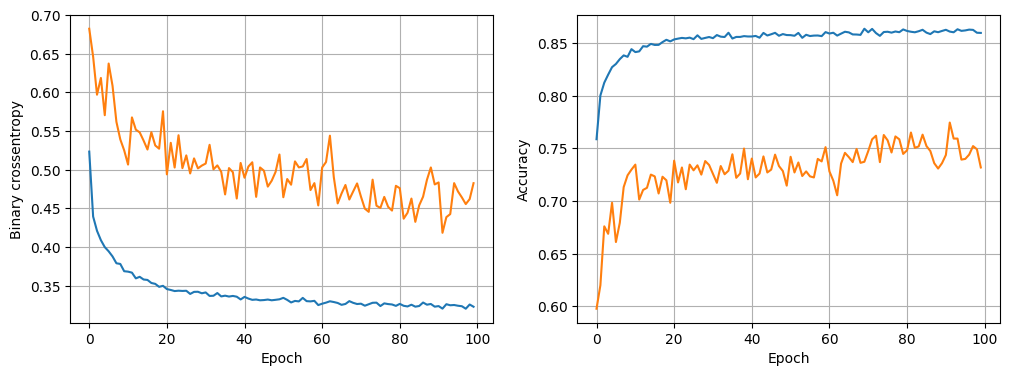

Training model with 16 nodes, dropout 0.2, lr 0.001, batch size 64


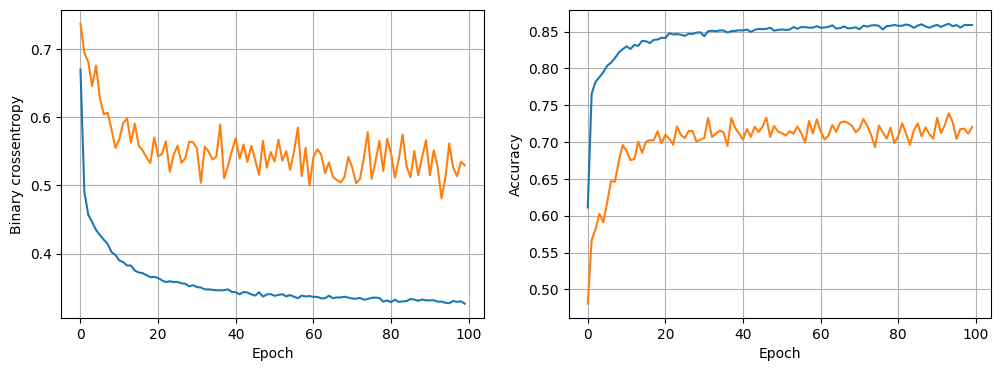

Training model with 16 nodes, dropout 0.2, lr 0.001, batch size 128


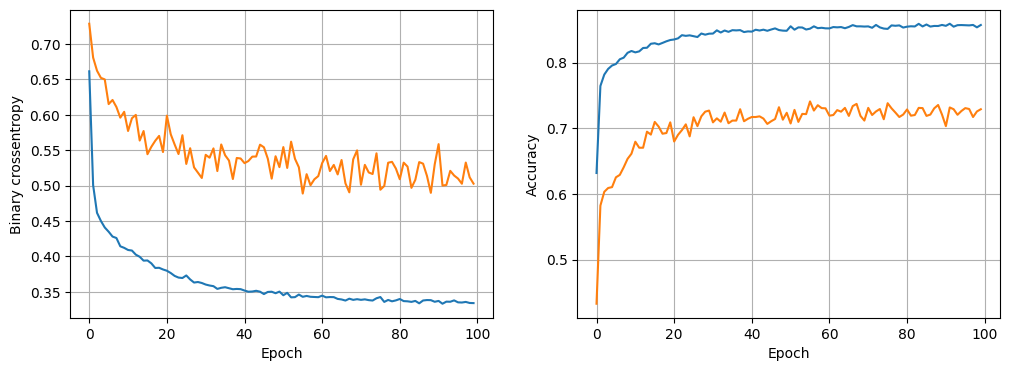

Training model with 32 nodes, dropout 0, lr 0.01, batch size 32


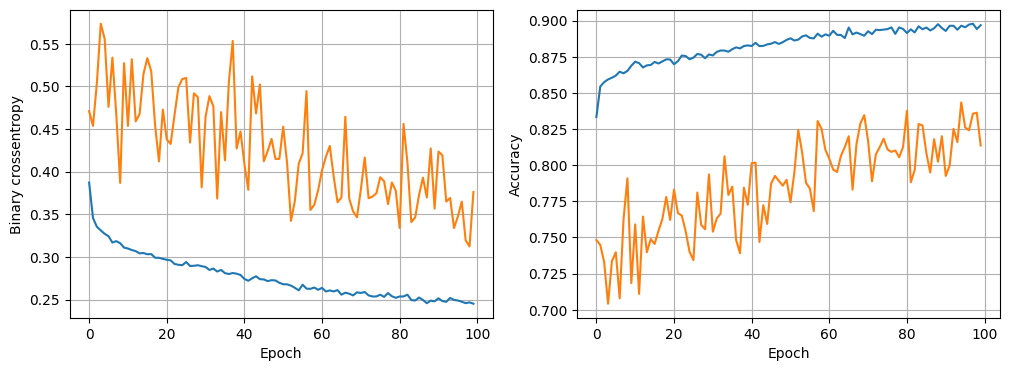

Training model with 32 nodes, dropout 0, lr 0.01, batch size 64


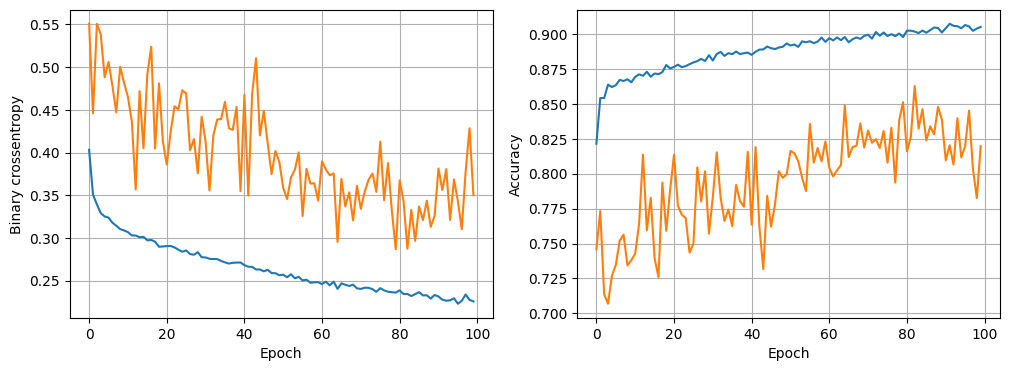

Training model with 32 nodes, dropout 0, lr 0.01, batch size 128


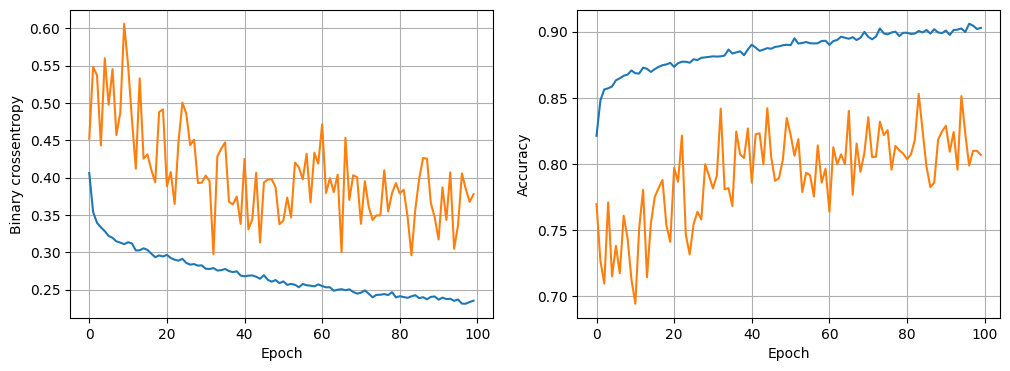

Training model with 32 nodes, dropout 0, lr 0.005, batch size 32


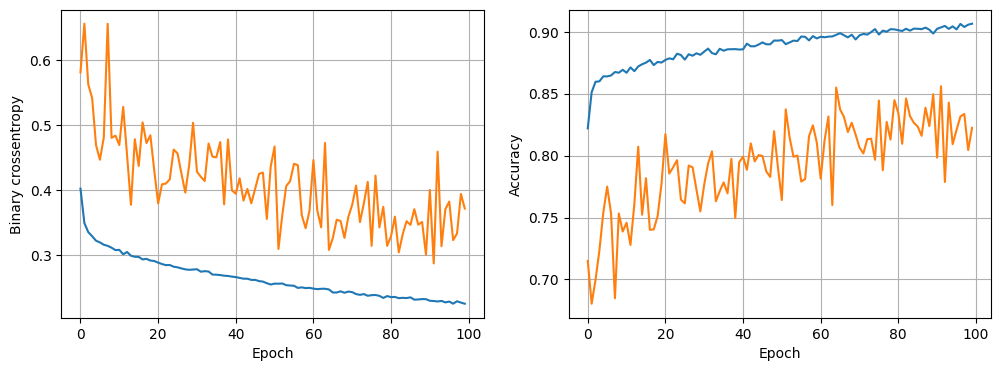

Training model with 32 nodes, dropout 0, lr 0.005, batch size 64


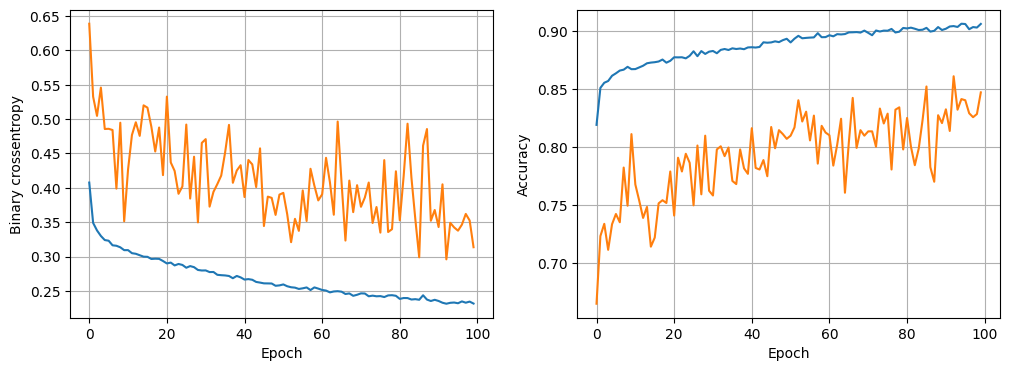

Training model with 32 nodes, dropout 0, lr 0.005, batch size 128


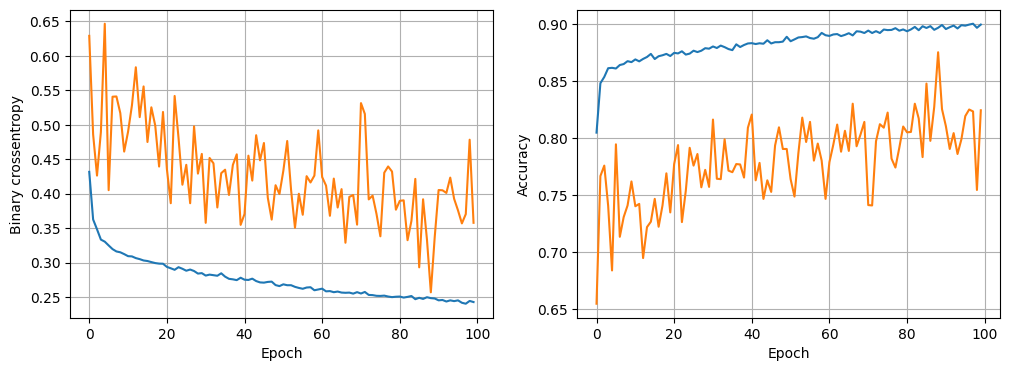

Training model with 32 nodes, dropout 0, lr 0.001, batch size 32


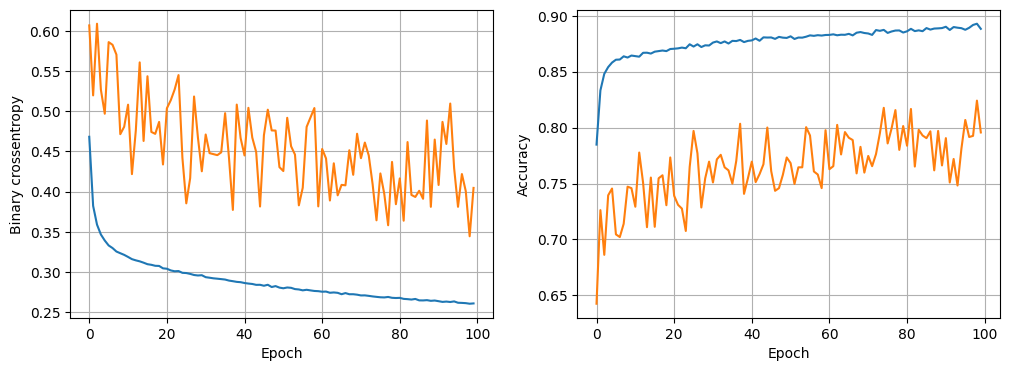

Training model with 32 nodes, dropout 0, lr 0.001, batch size 64


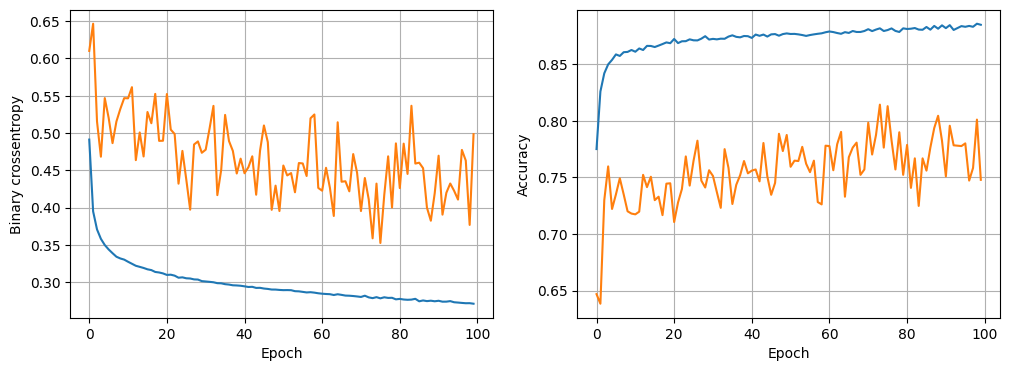

Training model with 32 nodes, dropout 0, lr 0.001, batch size 128


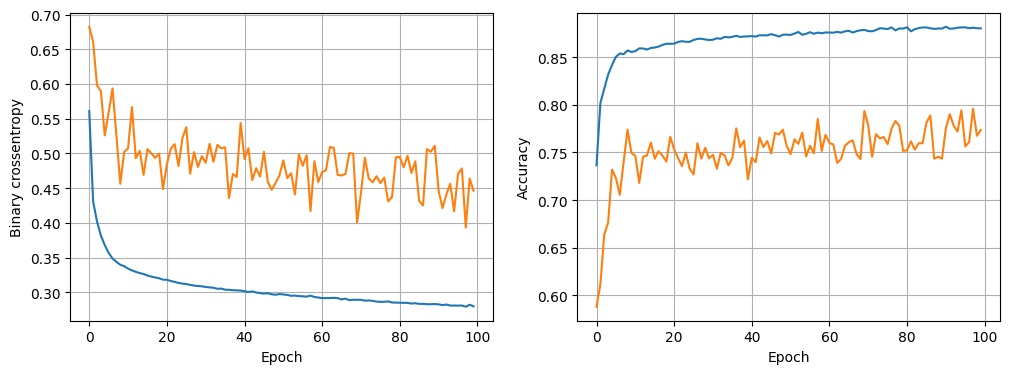

Training model with 32 nodes, dropout 0.2, lr 0.01, batch size 32


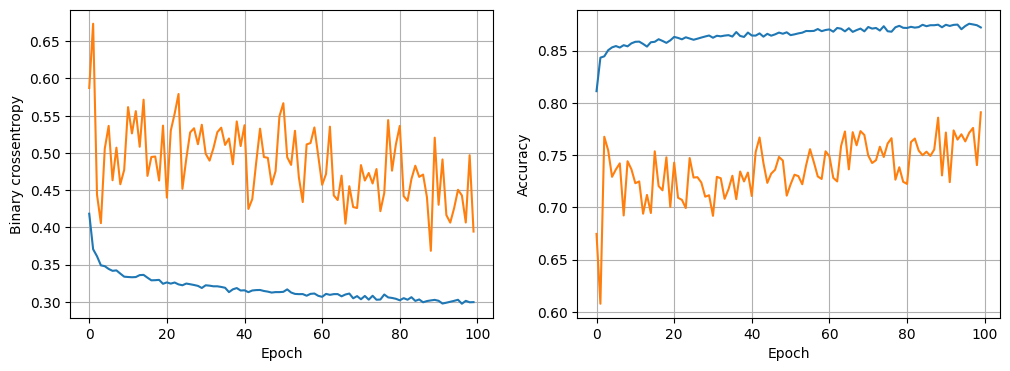

Training model with 32 nodes, dropout 0.2, lr 0.01, batch size 64


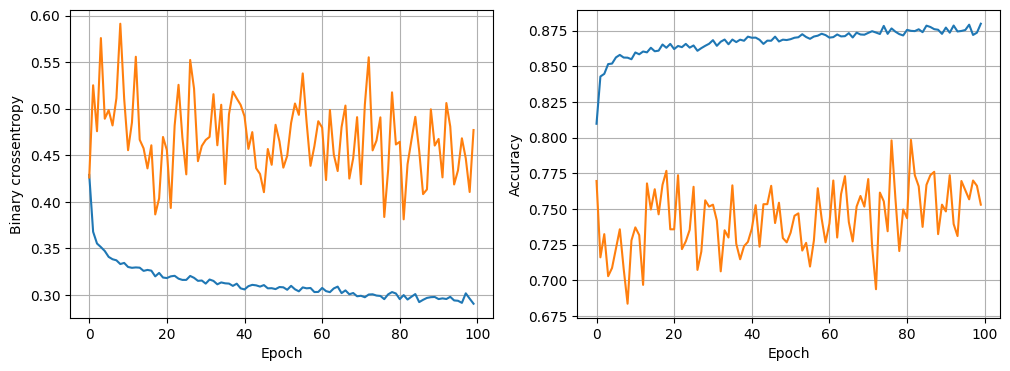

Training model with 32 nodes, dropout 0.2, lr 0.01, batch size 128


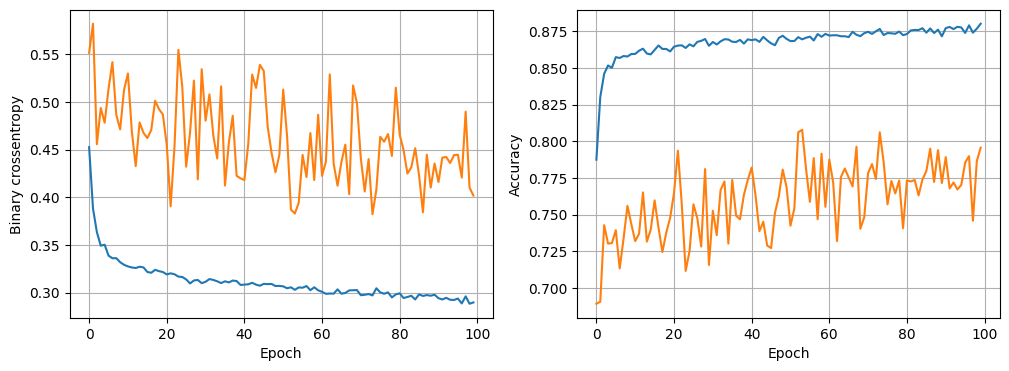

Training model with 32 nodes, dropout 0.2, lr 0.005, batch size 32


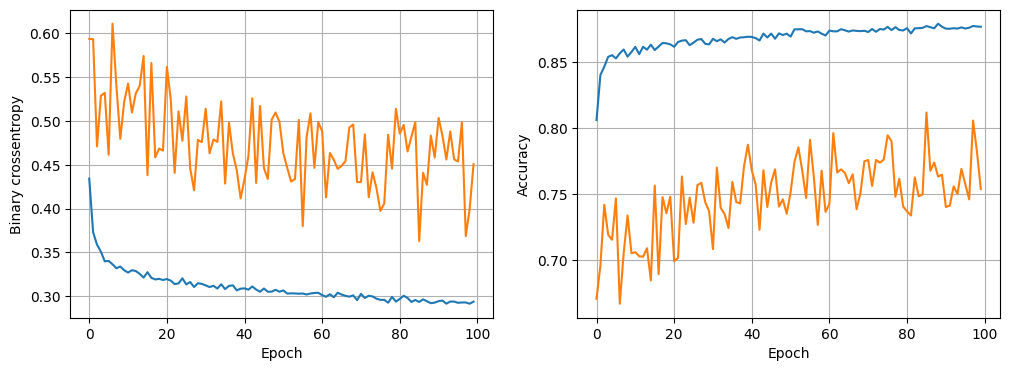

Training model with 32 nodes, dropout 0.2, lr 0.005, batch size 64


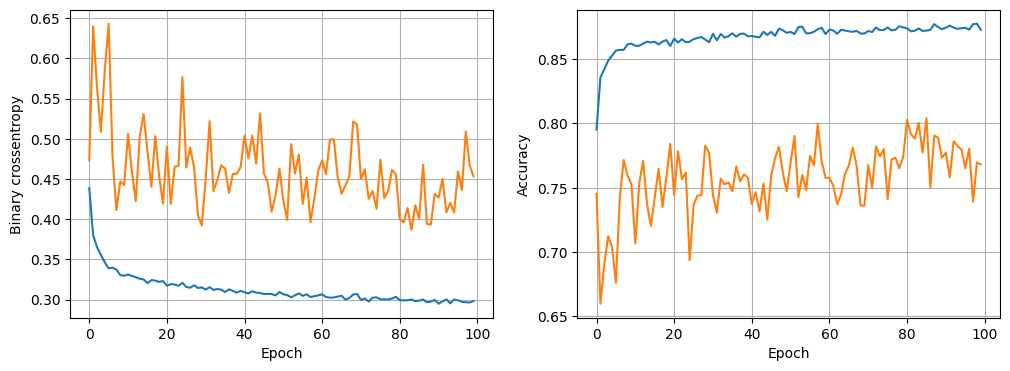

Training model with 32 nodes, dropout 0.2, lr 0.005, batch size 128


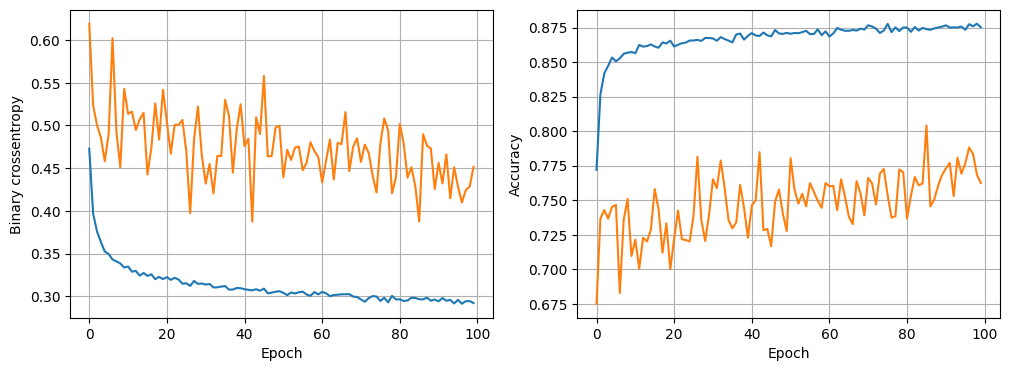

Training model with 32 nodes, dropout 0.2, lr 0.001, batch size 32


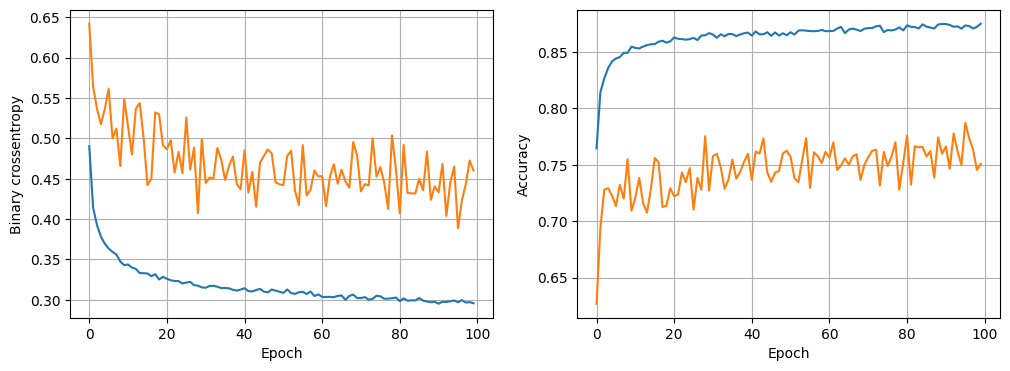

Training model with 32 nodes, dropout 0.2, lr 0.001, batch size 64


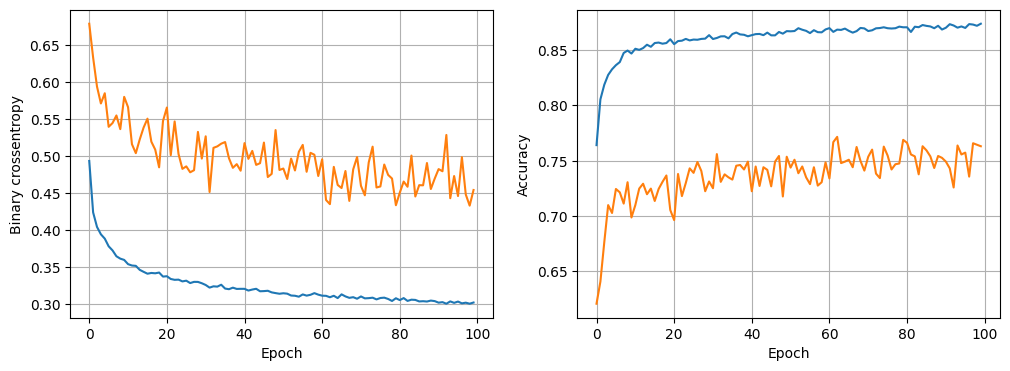

Training model with 32 nodes, dropout 0.2, lr 0.001, batch size 128


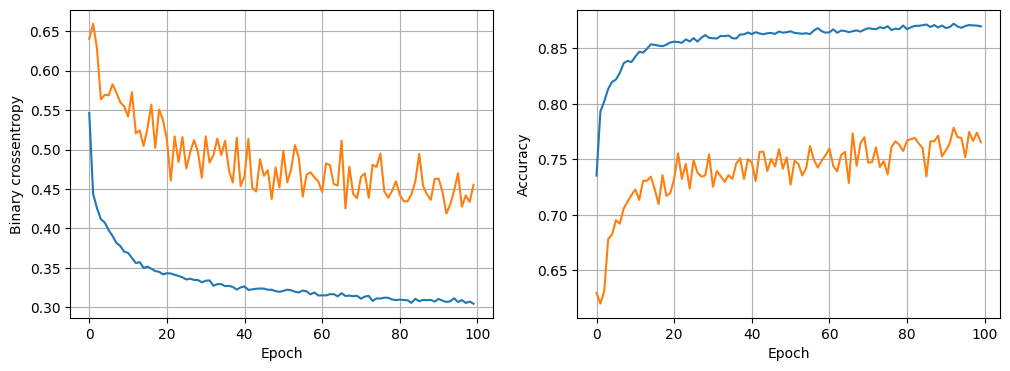

Training model with 64 nodes, dropout 0, lr 0.01, batch size 32


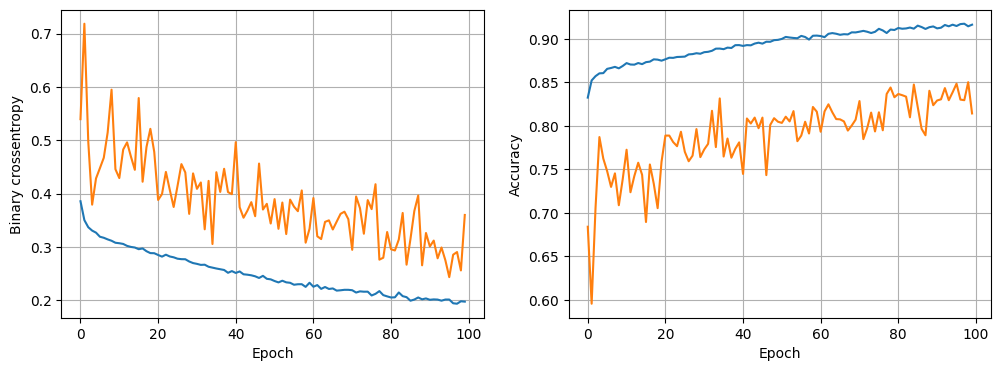

Training model with 64 nodes, dropout 0, lr 0.01, batch size 64


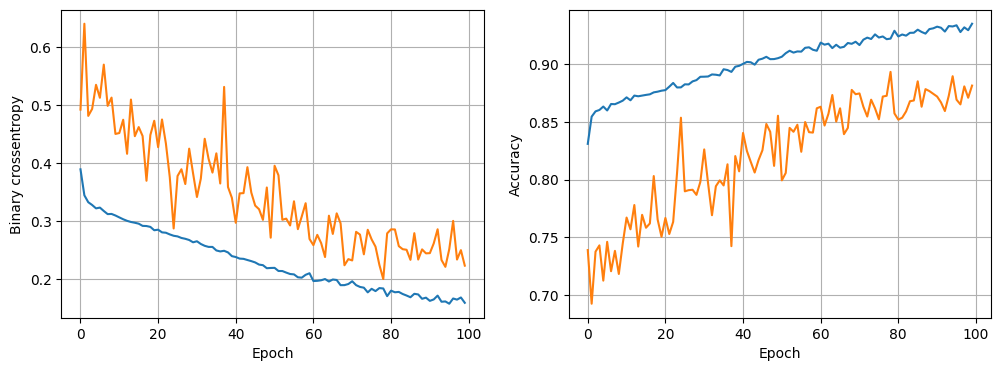

Training model with 64 nodes, dropout 0, lr 0.01, batch size 128


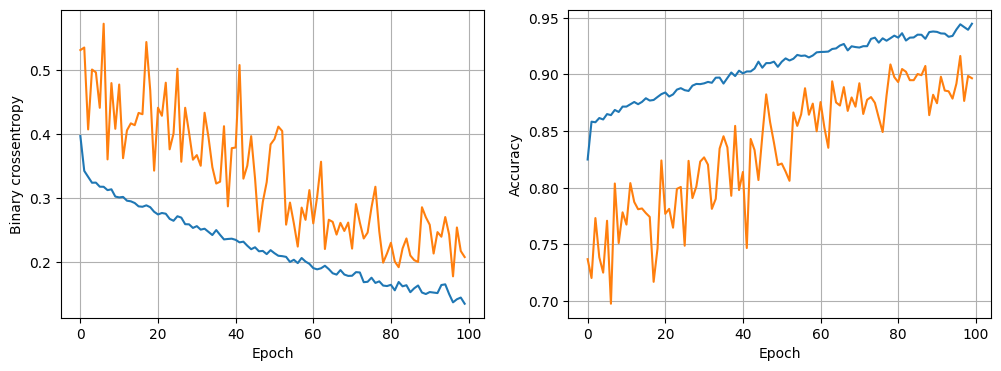

Training model with 64 nodes, dropout 0, lr 0.005, batch size 32


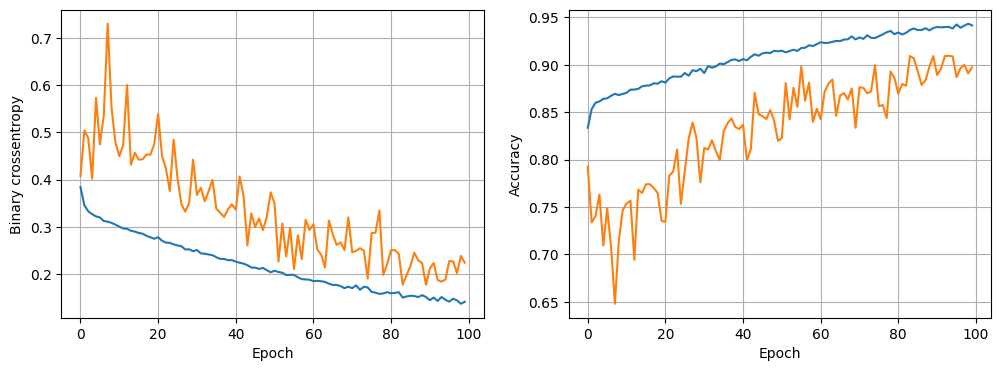

Training model with 64 nodes, dropout 0, lr 0.005, batch size 64


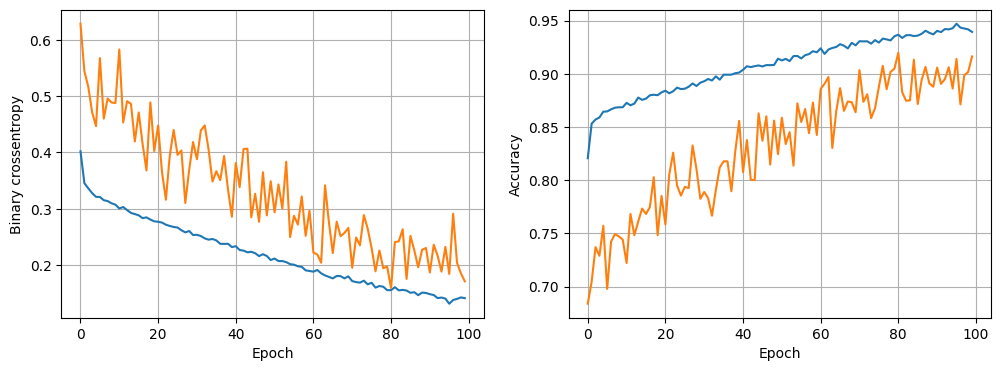

Training model with 64 nodes, dropout 0, lr 0.005, batch size 128


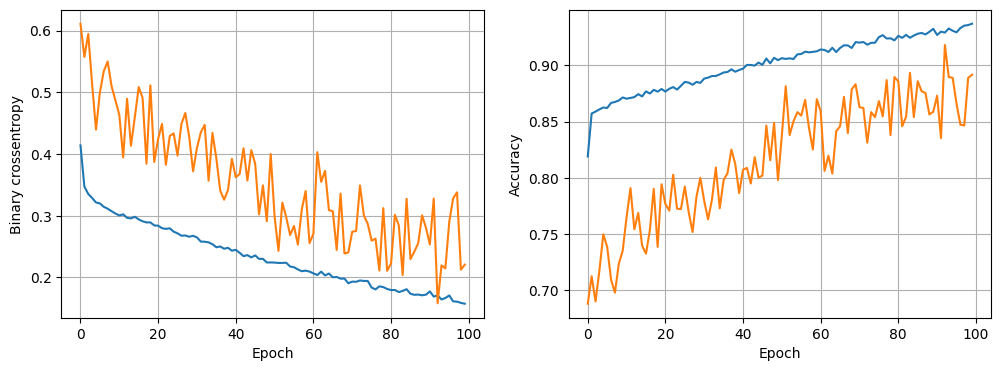

Training model with 64 nodes, dropout 0, lr 0.001, batch size 32


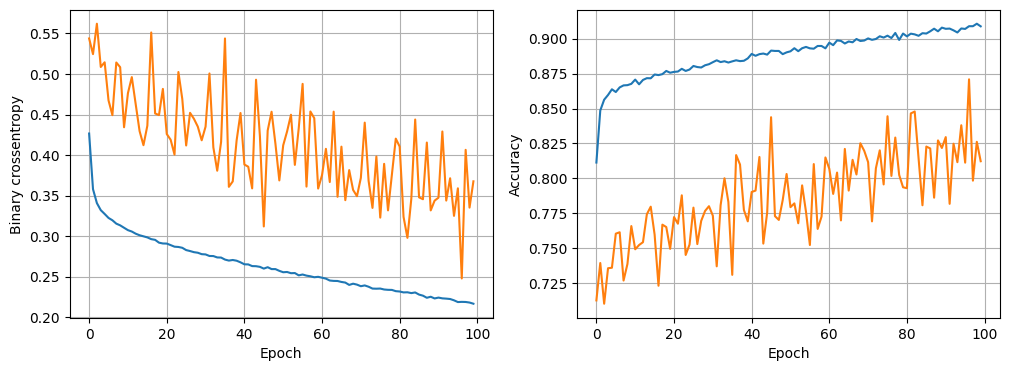

Training model with 64 nodes, dropout 0, lr 0.001, batch size 64


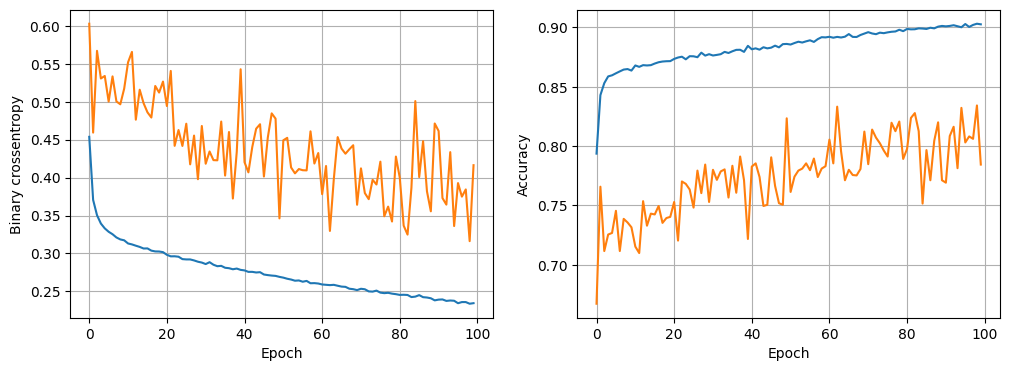

Training model with 64 nodes, dropout 0, lr 0.001, batch size 128


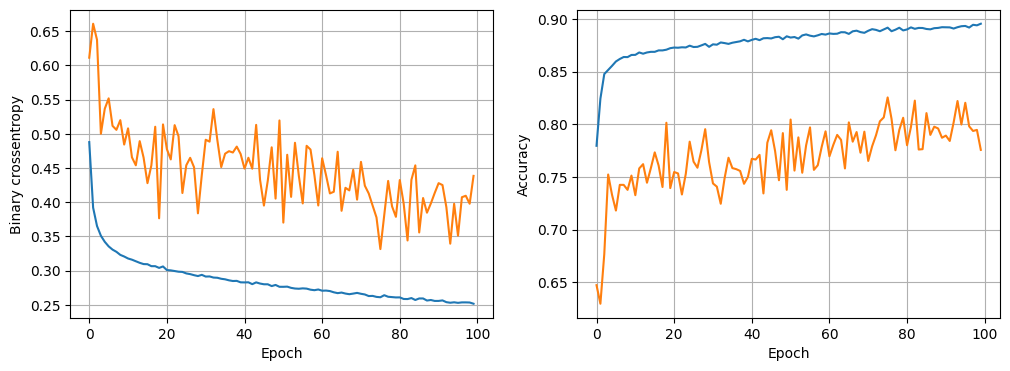

Training model with 64 nodes, dropout 0.2, lr 0.01, batch size 32


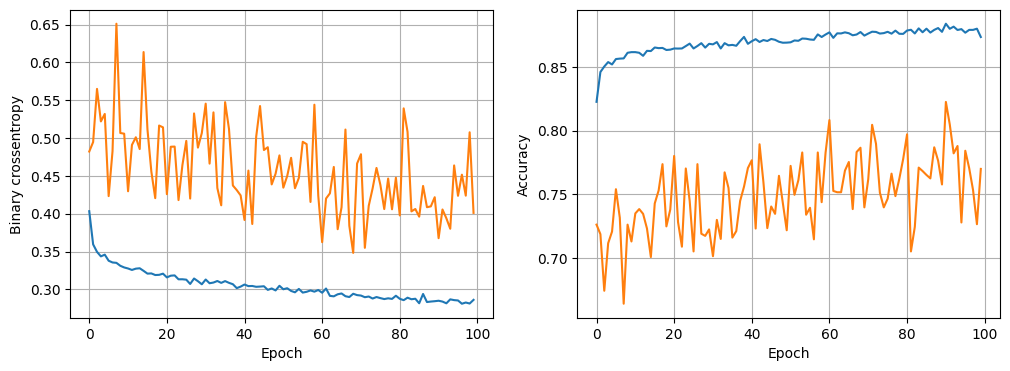

Training model with 64 nodes, dropout 0.2, lr 0.01, batch size 64


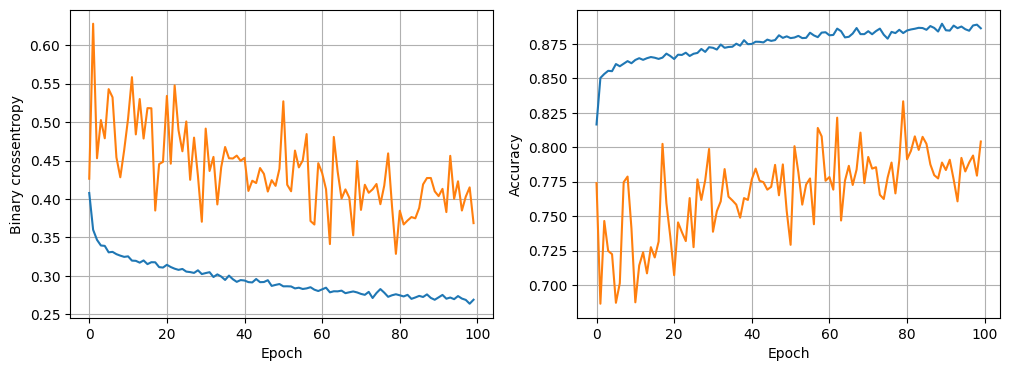

Training model with 64 nodes, dropout 0.2, lr 0.01, batch size 128


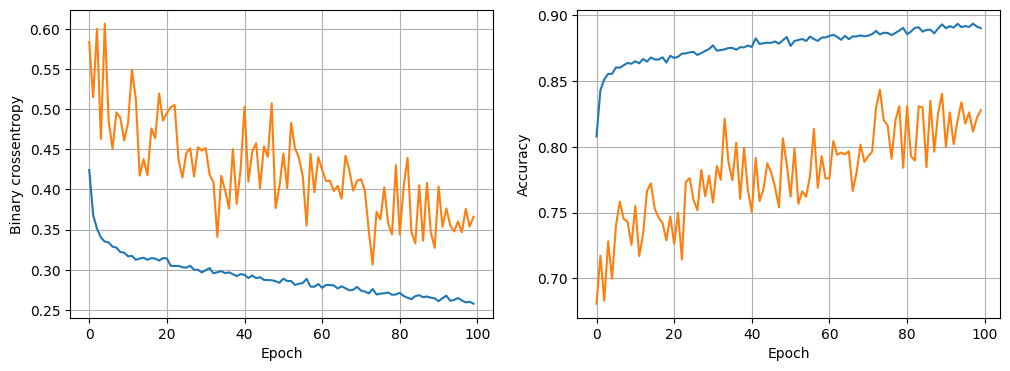

Training model with 64 nodes, dropout 0.2, lr 0.005, batch size 32


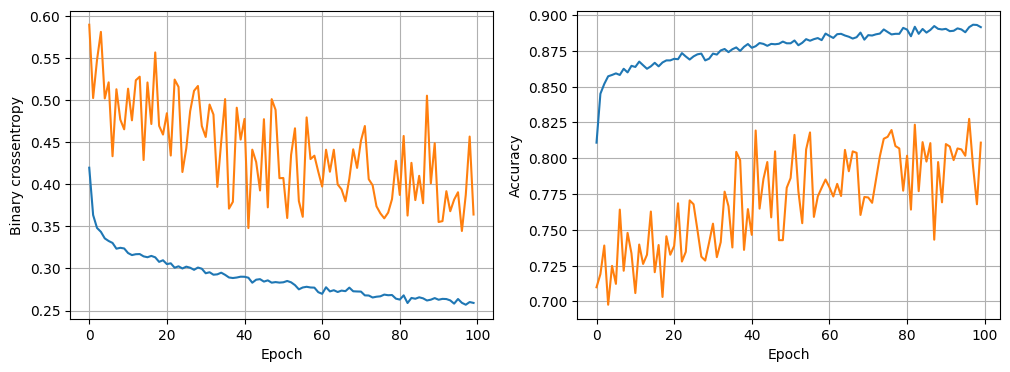

Training model with 64 nodes, dropout 0.2, lr 0.005, batch size 64


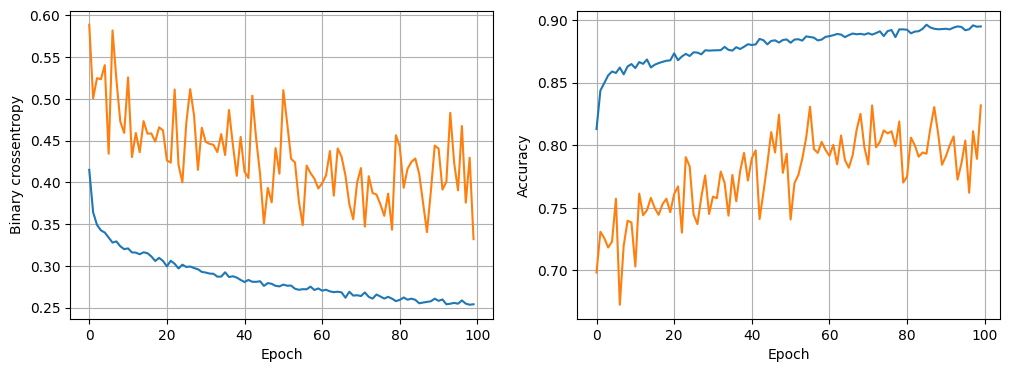

Training model with 64 nodes, dropout 0.2, lr 0.005, batch size 128


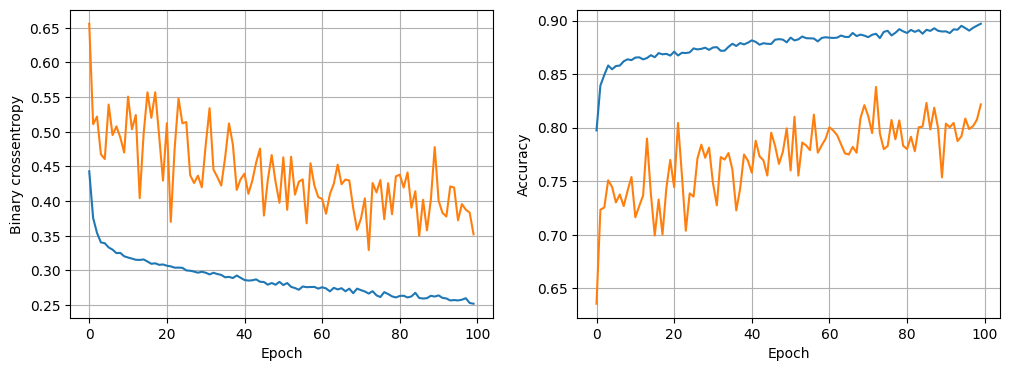

Training model with 64 nodes, dropout 0.2, lr 0.001, batch size 32


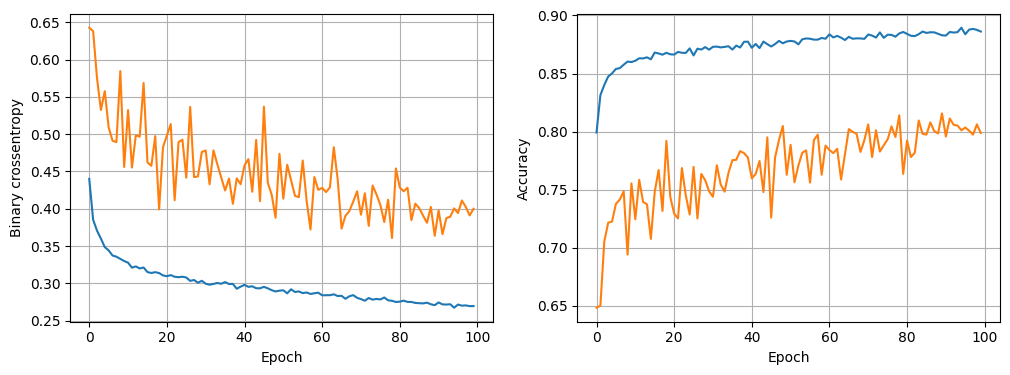

Training model with 64 nodes, dropout 0.2, lr 0.001, batch size 64


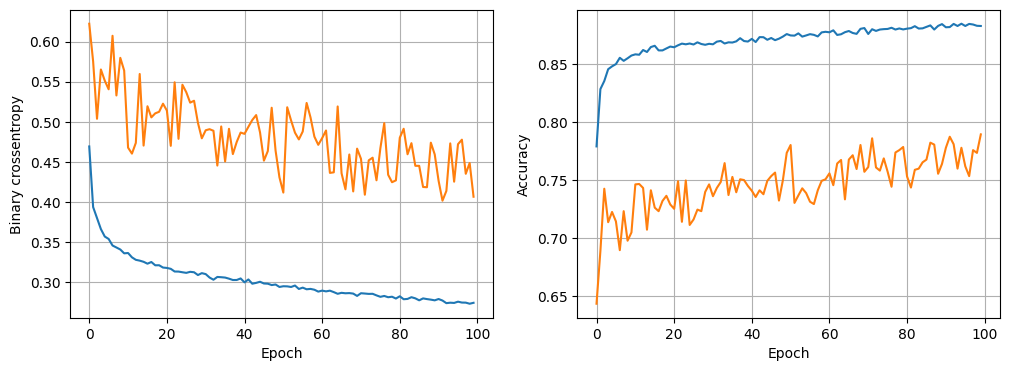

Training model with 64 nodes, dropout 0.2, lr 0.001, batch size 128


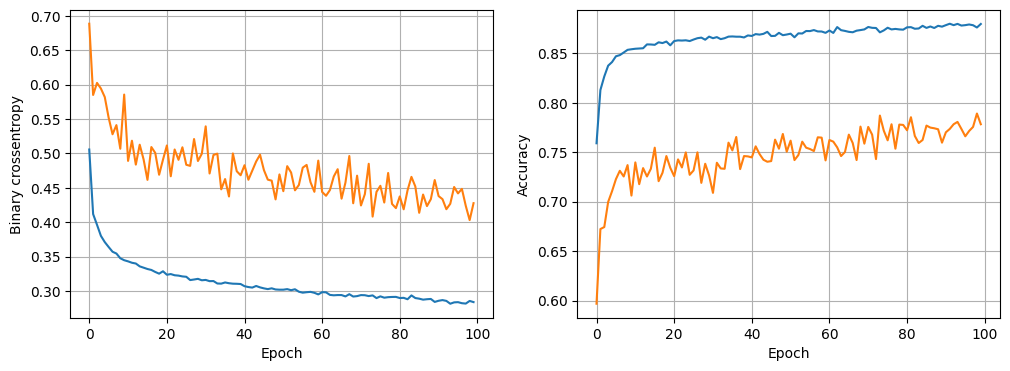

In [ ]:
least_val_loss = float('inf')
least_val_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"Training model with {num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size)
        plot_loss(history)
        val_loss = history.history['val_loss'][-1]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_val_model = model

In [ ]:
y_pred = least_val_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

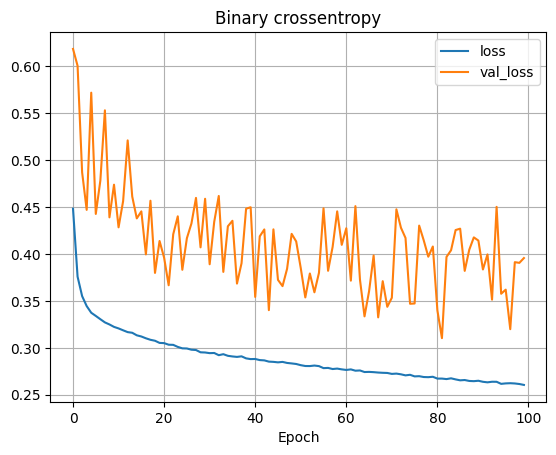

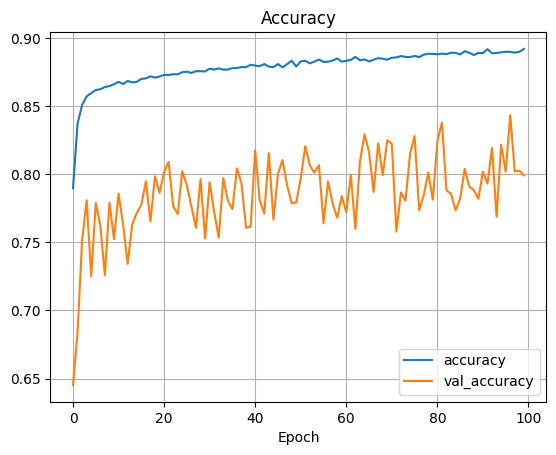

In [ ]:
print(classification_report(y_test, y_pred))